In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 215kB 8.7MB/s 
     |████████████████████████████████| 1.6MB 15.1MB/s 
     |████████████████████████████████| 7.2MB 58.7MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 317kB 69.4MB/s 
     |████████████████████████████████| 3.0MB 53.3MB/s 
     |████████████████████████████████| 890kB 63.9MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
     |████████████████████████████████| 122kB 59.0MB/s 
     |████████████████████████████████| 163kB 70.1MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 4.4MB 65.7MB/s 
     |████████████████████████████████| 112kB 69.7MB/s 
     |████████████████████████████████| 1.1MB 43.6MB/s 
     |████████████████████████████████| 890kB 54.2MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 122kB 65.0MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12

In [ ]:
import pandas as pd

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
#from simpletransformers.classification import ClassificationModel

In [ ]:
ROOT_PATH = "/content/drive/My Drive/Magíster 2020"

In [ ]:
puc_train = pd.read_json(f"{ROOT_PATH}/Ordenado/augmented_with_aurora/2020-09-12_puc_augmented.json", orient="records")
puc_test = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/puc_test_30.json", orient="records")

puj_train = pd.read_json(f"{ROOT_PATH}/Ordenado/augmented_with_aurora/2020-09-12_puj_augmented.json", orient="records")
puj_test = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/puj_test_30.json", orient="records")

aurora_train = pd.read_json(f"{ROOT_PATH}/Ordenado/augmented_with_aurora/2020-09-12_aurora_augmented.json", orient="records")
aurora_test = pd.read_json(f"{ROOT_PATH}/Ordenado/new_train_test_data/aurora_test_30.json", orient="records")

In [ ]:
train = pd.concat([puc_train, puj_train, aurora_train])
test = pd.concat([puc_test, puj_test, aurora_test])

In [ ]:
train = train[["clean_abstract", "first_sdg"]]
test = test[["clean_abstract", "first_sdg"]]

In [ ]:
train["first_sdg"] = train["first_sdg"] - 1
test["first_sdg"] = test["first_sdg"] - 1

In [ ]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average="micro")

def precision_multiclass(labels, preds):
    return precision_score(labels, preds, average="micro")

def recall_multiclass(labels, preds):
    return recall_score(labels, preds, average="micro")

In [ ]:
model_args = {
                "learning_rate": 1e-5,
                "num_train_epochs": 1,
                "reprocess_input_data": True,
                "overwrite_output_dir": True,
                "train_batch_size": 1,
                "eval_batch_size": 1,
                "max_seq_length": 1000,
                "output_dir": f"{ROOT_PATH}/augmented_with_aurora/model/outputs/",
                "cache_dir": f"{ROOT_PATH}/augmented_with_aurora/model/cache/",
                "best_model_dir": f"{ROOT_PATH}/augmented_with_aurora/model/outputs/best_model/"}
model = ClassificationModel(
    "longformer", "allenai/longformer-large-4096", num_labels=17, args=model_args
)
model.train_model(train, args=model_args)
results, model_outputs, predictions = model.eval_model(test, acc=accuracy_score, f1=f1_multiclass, precision=precision_multiclass, recall=recall_multiclass)
predictions = np.argmax(model_outputs, axis=-1).tolist()

Some weights of the model checkpoint at allenai/longformer-large-4096 were not used when initializing LongformerForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-large-4096 and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias',

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:304: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WA

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
predictions = [pred + 1 for pred in predictions]
train["first_sdg"] = train["first_sdg"] + 1
test["first_sdg"] = test["first_sdg"] + 1

In [ ]:
print(classification_report(test["first_sdg"], predictions))

              precision    recall  f1-score   support

           1       0.20      0.08      0.11        13
           2       0.57      0.52      0.55        75
           3       0.88      0.90      0.89       800
           4       0.87      0.80      0.84       205
           5       0.74      0.82      0.78       128
           6       0.65      0.71      0.68        91
           7       0.60      0.72      0.65       110
           8       0.39      0.35      0.37        34
           9       0.50      0.47      0.48       137
          10       0.70      0.64      0.67        81
          11       0.62      0.66      0.64       142
          12       0.43      0.30      0.36       106
          13       0.48      0.58      0.53       117
          14       0.63      0.60      0.62        60
          15       0.62      0.62      0.62       155
          16       0.71      0.69      0.70       113
          17       0.62      0.58      0.60        45

    accuracy              

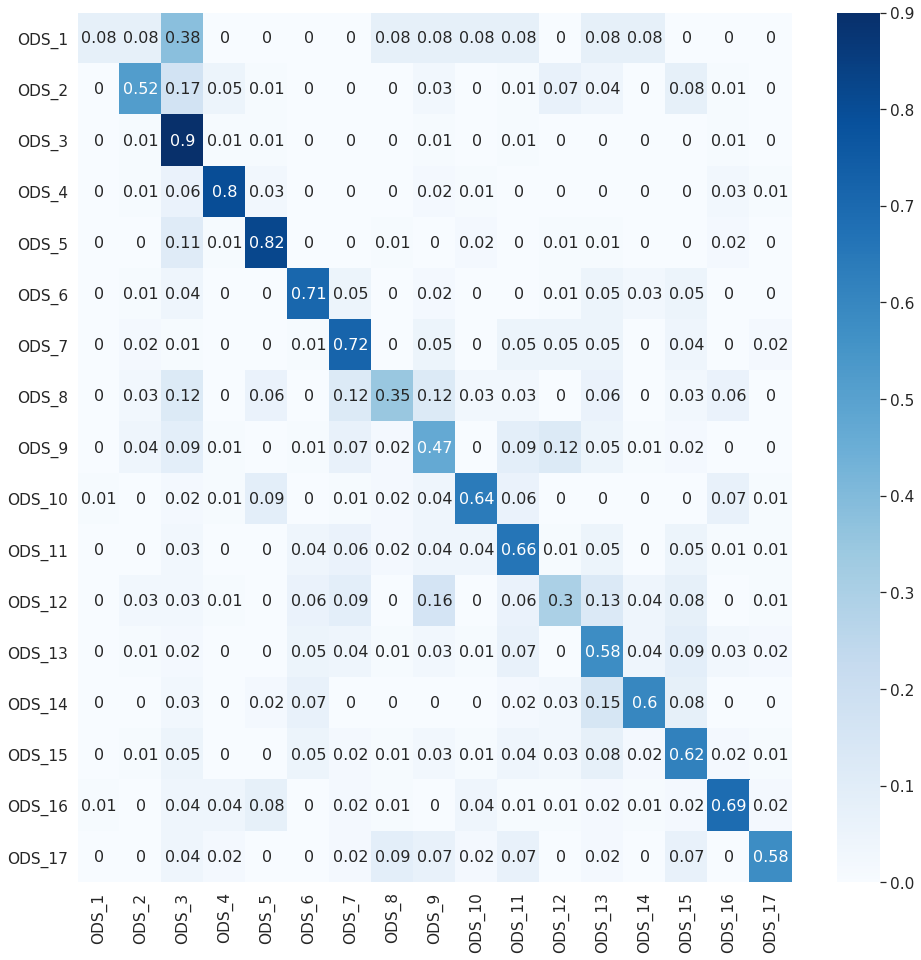

In [ ]:
conf_matrix = confusion_matrix(test["first_sdg"], predictions, labels=range(1, 18), normalize="true")
sdg_index = [f"ODS_{i}" for i in range(1, 18)]
df_cm = pd.DataFrame(conf_matrix, columns=sdg_index, index=sdg_index)
df_cm = df_cm.round(2)
plt.figure(figsize=(16,16))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
plt.show()